# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:red">  Numerical exercises 5: Metropolis - Hydrogen Atom</span>

$\textbf{Metropolis Algorithm}$

In the first exercises of this laboratory we were asked to sample some probability distribution functions (such as in importance sampling of Monte Carlo evaluation of integrals), which had a precise analitic expression, using the inverse cumulative function method. Unfortunately, this method doesn't work for many distribution probability functions for several reasons, for example:
- the distribution function may be not invertible
- the distribution function may be a function of more than one variable
- one may not know the whole analitic expression of the distribution probability function

The Monte Carlo algorithm known as *Metropolis algorithm* (or $M(RT)^2$ *algorithm*) solves each of these problematics leading us to the possibility to sample (almost) any probability distribution function. The algorithm works proposing a move from a coordinate $\vec{x}$ to a coordinate $\vec{y}$ via a transition probability distribution $T(\vec{y}\vert\vec{x})$ (which should be symmetric) and accepting the move with probability $P=min(1\,,\, \rho\,(\vec{y})/\rho\,(\vec{x}))$ where $\rho$ is the probability distribution function we wish to sample.

$\textbf{Hydrogen Atom}$

The task of this exercise was to sample the $1s$ and $2p_z$ orbital probability distributions for the electron in the hydrogen atom, given by:

$$|\Psi_{1s}(r,\theta,\phi)|^2 = |\Psi_{1,0,0}(r,\theta,\phi)|^2 = \frac{a_0^{-3}}{\pi} e^{-2r/a_0} $$

$$|\Psi_{2p_z}(r,\theta,\phi)|^2 = |\Psi_{2,1,0}(r,\theta,\phi)|^2 = \frac{a_0^{-5}}{64}\frac{2}{\pi} r^2 e^{-r/a_0} \cos^2(\theta)$$

in cartesian coordinates $(x;y;z)$ and using units of Bohr radius $a_0$, i.e. $a_0 = 1$.

I've used the origin $(0;0;0)$ as the starting point for the $1s$ orbital and $(0;0;1)$ for the $2p_z$ orbital, and I've computed $\langle r \rangle$ in both cases, using either a uniform transition probability $T(\vec{y}\vert\vec{x})$ and a gaussian one. 

The first phase of the simulation is the equilibration phase of the step $\delta$ of the proposed move, i.e the new position is proposed as:
- $x_i^{new} \in [x_i^{old} - \delta,\, x_i^{old} + \delta]\;,\; i=1,2,3\;$ for uniform sampling
- $x_i^{new} \in N(\mu=x_i^{old}, \sigma=\delta)\;,\; i=1,2,3\;$ for gaussian sampling

and should be chosen with the so called *50% empirical rule* which states that in a Metropolis algorithm the acceptance rate (i.e. the fraction of accepted moves with respect to the total proposed moves) should be $\simeq$ 50%.  
In the input file there's the possibility to set all four $\delta$, which in the equilibration phase I set to a low value (say 0.2), and there's a variable called *equilibration* which, if set to 1, activates the equilibration phase. When the program is then run, it searches the values of the four $\delta$ in order to respect the *50% empirical rule* (actually it searches an acceptance rate between 47% and 53%). Once the equilibration is over, the program I've written tells us the exact values of $\delta$ we have to use in our real simulation (they have to be set in the input file to that values, and the *equilibration* variable has to be set to 0).

Under these conditions we are ready to start the real simulation executing the code, choosing the number of proposed moves (n_throws) and the number of blocks (n_blocks) in the input file. The obtained results are shown in the following graphs.

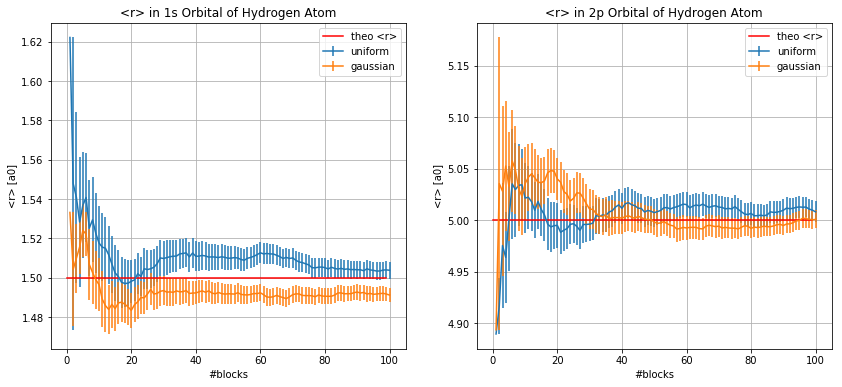

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
x, f, error = np.loadtxt("averages_1s_uniform.txt", usecols=(0, 1, 2), unpack='true')
plt.errorbar(x,f,yerr=error, label='uniform')
x, f, error = np.loadtxt("averages_1s_gaussian.txt", usecols=(0, 1, 2), unpack='true')
plt.errorbar(x,f,yerr=error, label='gaussian')
y = np.full(100, 1.5)
plt.plot(y, color='r', label='theo <r>')
plt.xlabel('#blocks')
plt.ylabel('<r> [a0]')
plt.title('<r> in 1s Orbital of Hydrogen Atom')
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
x, f, error = np.loadtxt("averages_2p_uniform.txt", usecols=(0, 1, 2), unpack='true')
plt.errorbar(x,f,yerr=error, label='uniform')
x, f, error = np.loadtxt("averages_2p_gaussian.txt", usecols=(0, 1, 2), unpack='true')
plt.errorbar(x,f,yerr=error, label='gaussian')
y = np.full(100, 5)
plt.plot(y, color='r', label='theo <r>')
plt.xlabel('#blocks')
plt.ylabel('<r> [a0]')
plt.title('<r> in 2p Orbital of Hydrogen Atom')
plt.grid(True)
plt.legend()

plt.show()

We can notice that in both orbtal samplings the simulated value is in agreement with the theoretical value with both uniform and gaussian sampling; this occurs because if the transition probability is symmetric the Metropolis algorithm does not depend on it.

In the following four graphs the actual positions visited by the electron, i.e. the shapes of the orbitals, are shown.

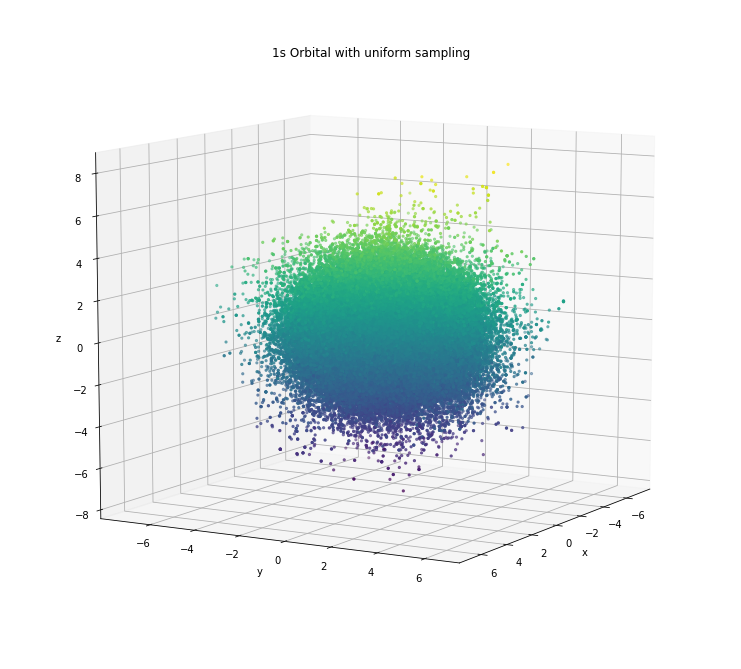

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

x, y, z = np.loadtxt("coordinates_1s_uniform.txt", usecols=(0,1,2), unpack='true')
fig = plt.figure(figsize=(10,9))
ax = Axes3D(fig)
ax.scatter(x, y, z, c=z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('1s Orbital with uniform sampling')
ax.view_init(10, 30)

plt.show()

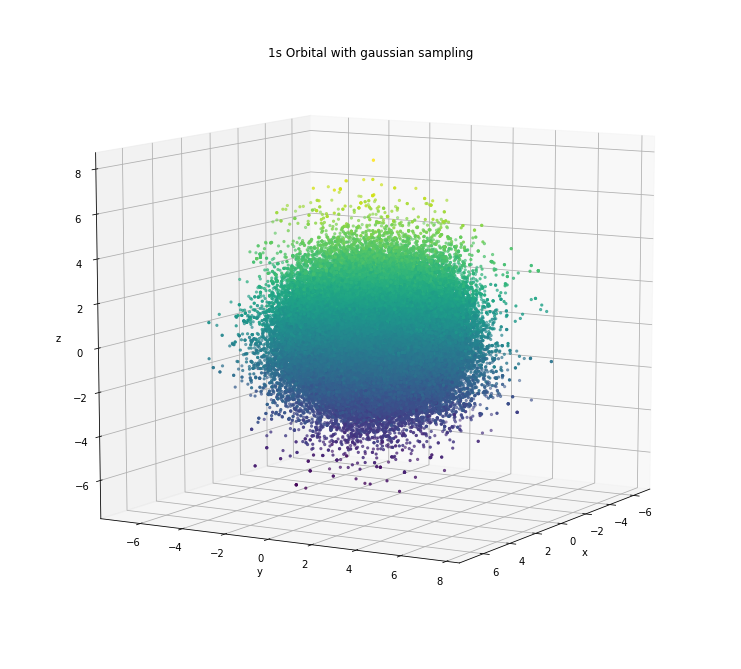

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

x, y, z = np.loadtxt("coordinates_1s_gaussian.txt", usecols=(0,1,2), unpack='true')
fig = plt.figure(figsize=(10,9))
ax = Axes3D(fig)
ax.scatter(x, y, z, c=z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('1s Orbital with gaussian sampling')
ax.view_init(10, 30)

plt.show()

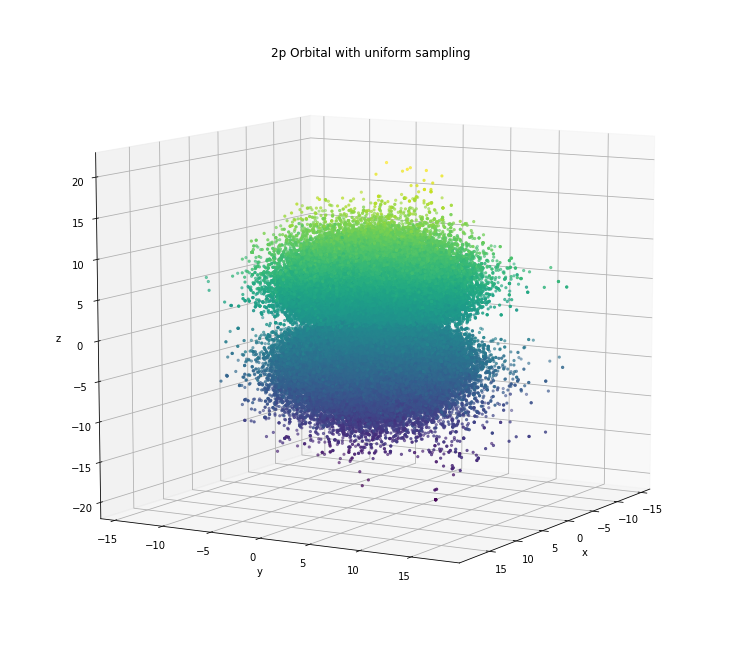

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

x, y, z = np.loadtxt("coordinates_2p_uniform.txt", usecols=(0,1,2), unpack='true')
fig = plt.figure(figsize=(10,9))
ax = Axes3D(fig)
ax.scatter(x, y, z, c=z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('2p Orbital with uniform sampling')
ax.view_init(10, 30)

plt.show()

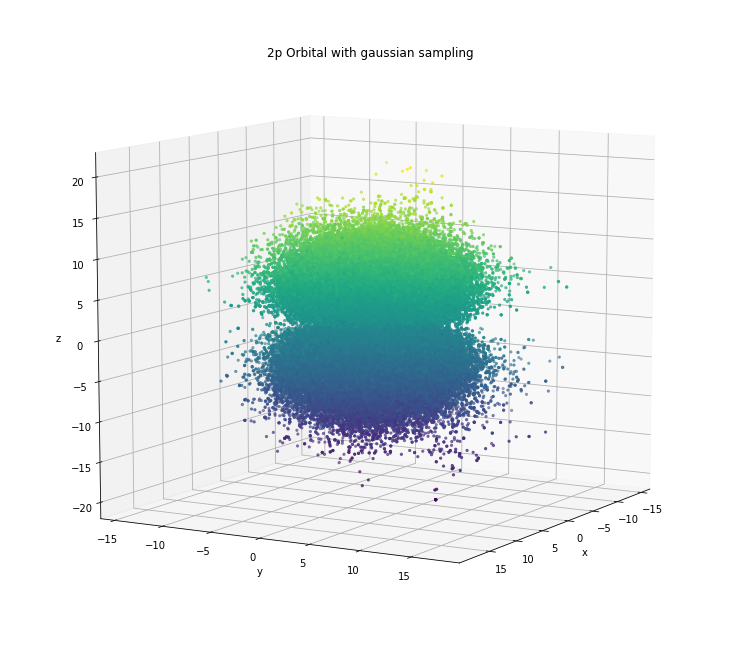

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

x, y, z = np.loadtxt("coordinates_2p_uniform.txt", usecols=(0,1,2), unpack='true')
fig = plt.figure(figsize=(10,9))
ax = Axes3D(fig)
ax.scatter(x, y, z, c=z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('2p Orbital with gaussian sampling')
ax.view_init(10, 30)

plt.show()